In [1]:
##### # Imports

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [2]:
# # # Data Cleaning and Formatting

# # Load in the Data and Examine

# Read in credit into a dataframe 
credit_train = pd.read_csv('../input/credit_train.csv')

# Display top of dataframe
credit_train.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [3]:
credit_train.shape

(100514, 19)

In [4]:
# # Data Types and Missing Values

# See the column data types and non-missing values
credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

In [5]:
# Statistics for each column
credit_train.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [6]:
credit_train.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [7]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(credit_train)

Your selected dataframe has 17 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


In [9]:
# Drop the columns with > 50% missing
credit_train.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [10]:
credit_train[credit_train['Years of Credit History'].isnull() == True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
for i in credit_train[credit_train['Years of Credit History'].isnull() == True].index:
    print(i)

100000
100001
100002
100003
100004
100005
100006
100007
100008
100009
100010
100011
100012
100013
100014
100015
100016
100017
100018
100019
100020
100021
100022
100023
100024
100025
100026
100027
100028
100029
100030
100031
100032
100033
100034
100035
100036
100037
100038
100039
100040
100041
100042
100043
100044
100045
100046
100047
100048
100049
100050
100051
100052
100053
100054
100055
100056
100057
100058
100059
100060
100061
100062
100063
100064
100065
100066
100067
100068
100069
100070
100071
100072
100073
100074
100075
100076
100077
100078
100079
100080
100081
100082
100083
100084
100085
100086
100087
100088
100089
100090
100091
100092
100093
100094
100095
100096
100097
100098
100099
100100
100101
100102
100103
100104
100105
100106
100107
100108
100109
100110
100111
100112
100113
100114
100115
100116
100117
100118
100119
100120
100121
100122
100123
100124
100125
100126
100127
100128
100129
100130
100131
100132
100133
100134
100135
100136
100137
100138
100139
100140
100141
100142

In [12]:
credit_train.drop(credit_train.tail(514).index, inplace=True) # drop last 514 rows
missing_values_table(credit_train)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


In [13]:
for i in credit_train['Maximum Open Credit'][credit_train['Maximum Open Credit'].isnull() == True].index:
    credit_train.drop(labels=i, inplace=True)
missing_values_table(credit_train)

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19153,19.2
Annual Income,19153,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0


In [14]:
for i in credit_train['Tax Liens'][credit_train['Tax Liens'].isnull() == True].index:
    credit_train.drop(labels=i, inplace=True)
missing_values_table(credit_train)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19149,19.2
Annual Income,19149,19.2
Years in current job,4222,4.2
Bankruptcies,194,0.2


In [15]:
for i in credit_train['Bankruptcies'][credit_train['Bankruptcies'].isnull() == True].index:
    credit_train.drop(labels=i, inplace=True)
missing_values_table(credit_train)


Your selected dataframe has 16 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19111,19.2
Annual Income,19111,19.2
Years in current job,4222,4.2


In [16]:
credit_train.fillna(credit_train.mean(), inplace=True)
missing_values_table(credit_train)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,4222,4.2


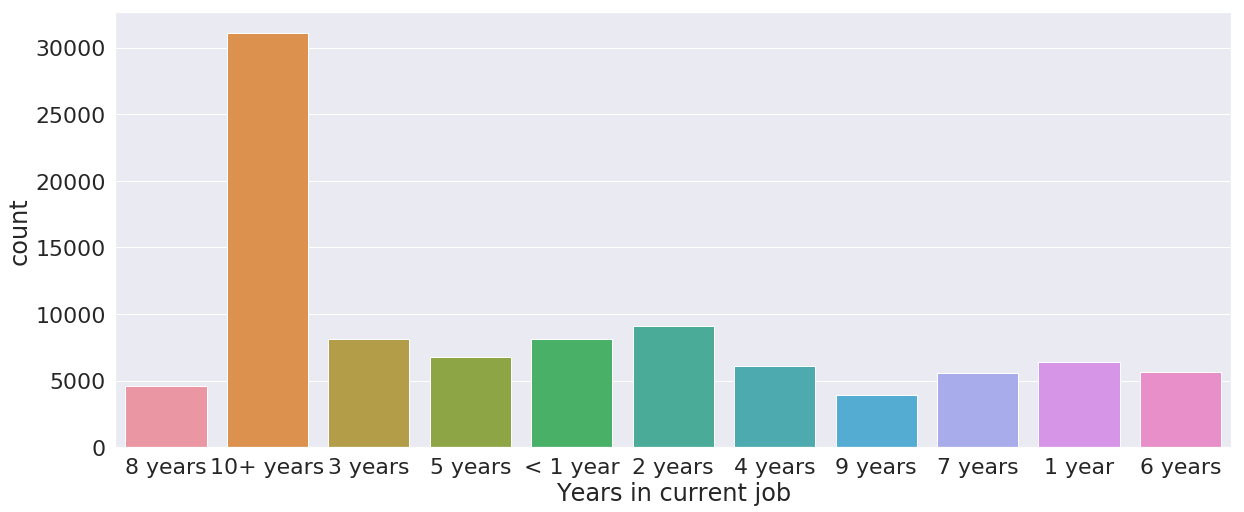

In [17]:
plt.figure(figsize=(20,8))

sns.countplot(credit_train['Years in current job'])

In [18]:
credit_train.fillna('10+ years', inplace=True)
missing_values_table(credit_train)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


/opt/conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '
/opt/conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:209: UserWarning: tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes height small enough '


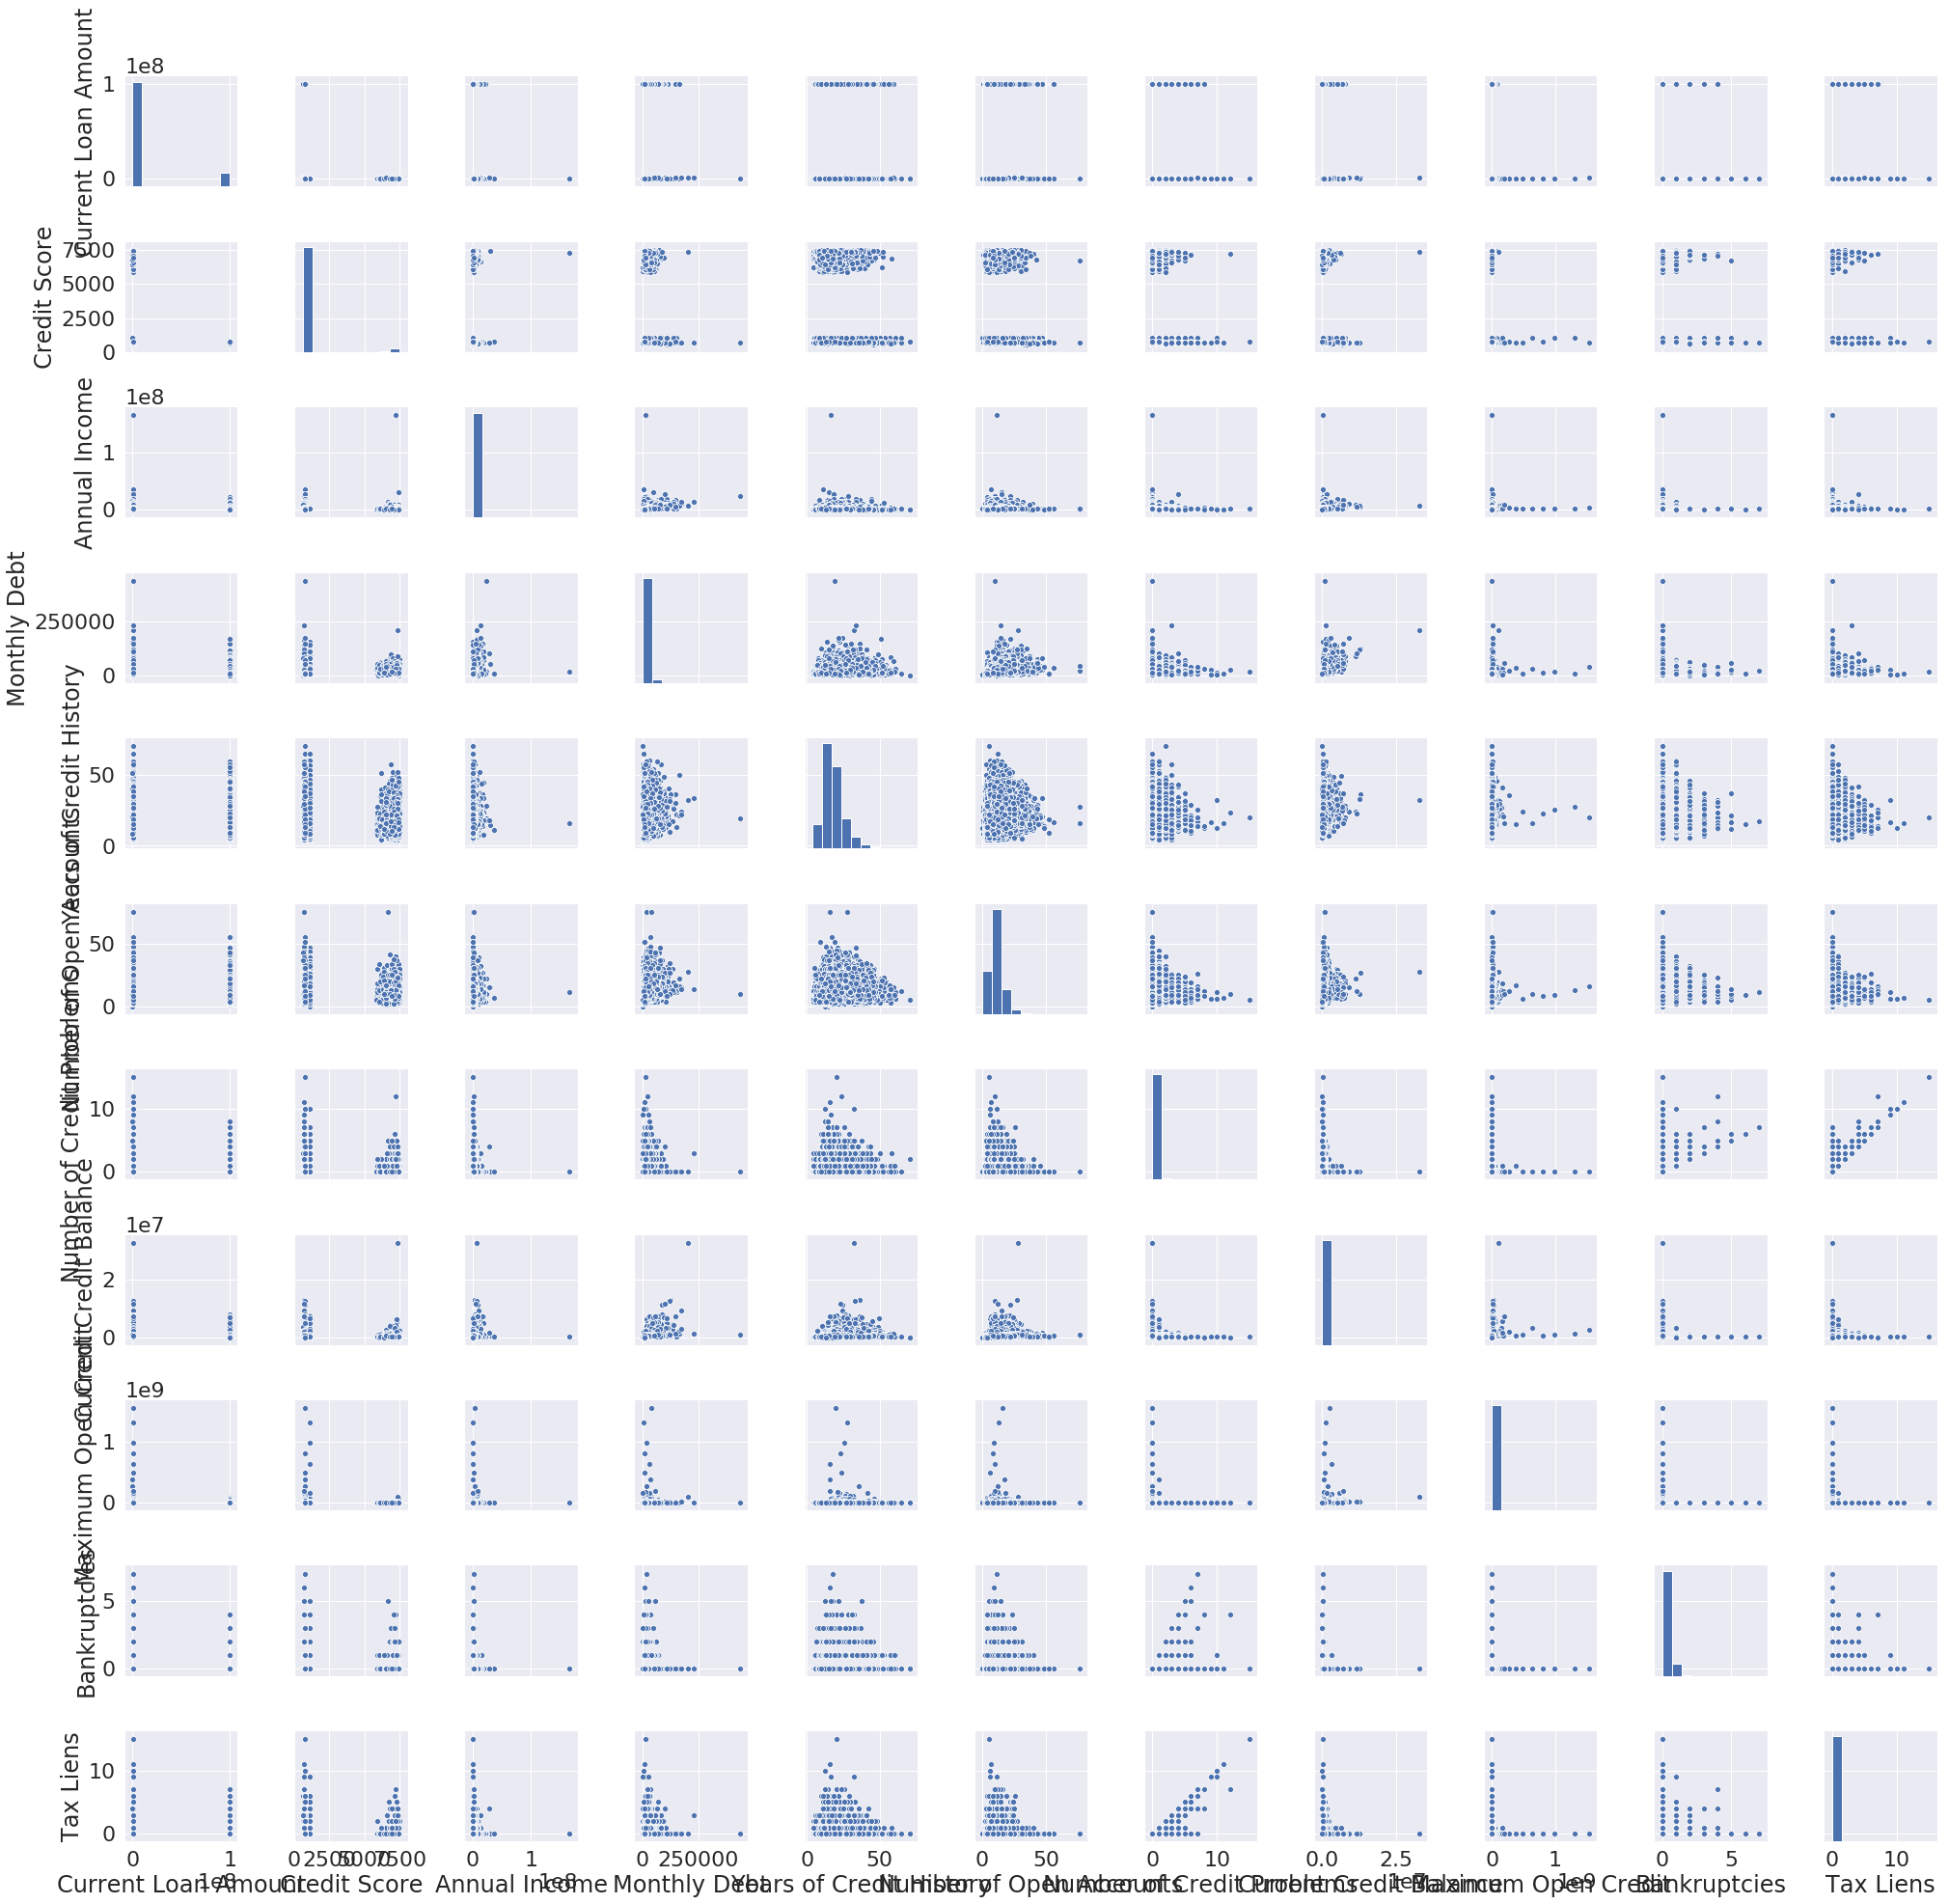

In [19]:
# # # Exploratory Data Analysis

sns.pairplot(credit_train)

In [20]:
# # Correlations between Features and Target

# Find all correlations and sort 
correlations_data = credit_train.corr()['Credit Score'].sort_values(ascending=False)

# Print the correlations
print(correlations_data.tail)

<bound method NDFrame.tail of Credit Score                 1.000000
Number of Open Accounts      0.005726
Tax Liens                    0.004765
Current Credit Balance       0.000168
Monthly Debt                -0.001457
Maximum Open Credit         -0.002073
Number of Credit Problems   -0.002785
Bankruptcies                -0.006257
Years of Credit History     -0.008652
Annual Income               -0.016989
Current Loan Amount         -0.095108
Name: Credit Score, dtype: float64>


In [21]:
# # # Importing the TEST dataset

credit_test = pd.read_csv('../input/credit_test.csv')
credit_test.head()

,Loan ID,Customer ID,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,f738779f-c726-40dc-92cf-689d73af533d,ded0b3c3-6bf4-4091-8726-47039f2c1b90,611314.0,Short Term,747.0,2074116.0,10+ years,Home Mortgage,Debt Consolidation,42000.83,21.8,NaN,9.0,0.0,621908.0,1058970.0,0.0,0.0
1,6dcc0947-164d-476c-a1de-3ae7283dde0a,1630e6e3-34e3-461a-8fda-09297d3140c8,266662.0,Short Term,734.0,1919190.0,10+ years,Home Mortgage,Debt Consolidation,36624.40,19.4,NaN,11.0,0.0,679573.0,904442.0,0.0,0.0
2,f7744d01-894b-49c3-8777-fc6431a2cff1,2c60938b-ad2b-4702-804d-eeca43949c52,153494.0,Short Term,709.0,871112.0,2 years,Rent,Debt Consolidation,8391.73,12.5,10.0,10.0,0.0,38532.0,388036.0,0.0,0.0
3,83721ffb-b99a-4a0f-aea5-ef472a138b41,12116614-2f3c-4d16-ad34-d92883718806,176242.0,Short Term,727.0,780083.0,10+ years,Rent,Debt Consolidation,16771.87,16.5,27.0,16.0,1.0,156940.0,531322.0,1.0,0.0
4,08f3789f-5714-4b10-929d-e1527ab5e5a3,39888105-fd5f-4023-860a-30a3e6f5ccb7,321992.0,Short Term,744.0,1761148.0,10+ years,Home Mortgage,Debt Consolidation,39478.77,26.0,44.0,14.0,0.0,359765.0,468072.0,0.0,0.0


In [22]:
credit_test.shape

(10353, 18)

In [23]:
credit_test.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

In [24]:
missing_values_table(credit_test)

Your selected dataframe has 16 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,5659,54.7
Credit Score,2334,22.5
Annual Income,2334,22.5
Years in current job,780,7.5
Bankruptcies,375,3.6
Tax Liens,354,3.4
Current Loan Amount,353,3.4
Term,353,3.4
Home Ownership,353,3.4
Purpose,353,3.4


In [25]:
# Drop the columns with > 50% missing
credit_test.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [26]:
credit_test[credit_test['Years of Credit History'].isnull() == True].head(50)

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
for i in credit_test[credit_test['Years of Credit History'].isnull() == True].index:
    print(i)

10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
1016

In [28]:
credit_test.drop(credit_test.tail(514).index, inplace=True) # drop last 514 rows
missing_values_table(credit_test)

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,1950,19.8
Annual Income,1950,19.8
Years in current job,424,4.3
Bankruptcies,21,0.2


In [29]:
credit_test.fillna(credit_test.mean(), inplace=True)
missing_values_table(credit_test)

Your selected dataframe has 15 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,424,4.3


In [30]:
credit_test.dropna(inplace=True)
missing_values_table(credit_test)

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [31]:
# # # Feature Engineering and Selection

credit_train.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [32]:
credit_test.columns

Index(['Current Loan Amount', 'Term', 'Credit Score', 'Annual Income',
       'Years in current job', 'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [33]:
# # Encoding categorical data & Feature Scaling

# Select the categorical columns
categorical_subset_train = credit_train[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]
categorical_subset_test = credit_test[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

# One hot encode
categorical_subset_train = pd.get_dummies(categorical_subset_train)
categorical_subset_test = pd.get_dummies(categorical_subset_test)

# Join the dataframe in credit_train
# Make sure to use axis = 1 to perform a column bind
# First I will drop the 'old' categorical datas and after I will join the 'new' one.

credit_train.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
credit_train = pd.concat([credit_train, categorical_subset_train], axis = 1)

credit_test.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
credit_test = pd.concat([credit_test, categorical_subset_test], axis = 1)

In [34]:
# #  Remove Collinear Features

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back in to the data
    x['Loan Status'] = y
               
    return x

In [35]:
# Remove the collinear features above a specified correlation coefficient
credit_train = remove_collinear_features(credit_train, 0.6);

In [36]:
credit_train.shape

(99794, 42)

In [37]:
for i in credit_test.columns:
    if i in credit_train.columns:
        continue
    else:
        credit_test.drop(i, axis=1, inplace=True)

In [38]:
credit_test.shape

(9415, 41)

In [39]:
# # # Split Into Training and Testing Sets¶

X_train = credit_train.drop(labels='Loan Status', axis=1).values
y_train = credit_train.iloc[:,-1].values
X_test = credit_test.iloc[:,:].values

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(99794, 41)
(9415, 41)
(99794,)


In [40]:
X_train

array([[4.45412000e+05, 7.09000000e+02, 1.16749300e+06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.62328000e+05, 1.07627510e+03, 1.37833905e+06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999990e+07, 7.41000000e+02, 2.23189200e+06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.03136000e+05, 7.42000000e+02, 1.15054500e+06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.30332000e+05, 7.46000000e+02, 1.71752400e+06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99999990e+07, 7.43000000e+02, 9.35180000e+05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [41]:
y_train

array(['Fully Paid', 'Fully Paid', 'Fully Paid', ..., 'Fully Paid',
       'Fully Paid', 'Fully Paid'], dtype=object)

In [42]:
X_test

array([[6.113140e+05, 7.470000e+02, 2.074116e+06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.666620e+05, 7.340000e+02, 1.919190e+06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.534940e+05, 7.090000e+02, 8.711120e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.343100e+05, 7.220000e+02, 1.546600e+06, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [9.154200e+04, 7.040000e+02, 5.646990e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [3.883440e+05, 7.180000e+02, 9.541800e+05, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [83]:
# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [89]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [84]:
X_train

array([[-3.55946457e-01, -2.76919722e-01, -2.16940122e-01, ...,
        -5.27583551e-02, -3.18293928e-02, -3.35197399e-02],
       [-3.61707496e-01, -7.12009475e-18,  5.34586567e-17, ...,
        -5.27583551e-02, -3.18293928e-02, -3.35197399e-02],
       [ 2.77670192e+00, -2.52792219e-01,  8.78223137e-01, ...,
        -5.27583551e-02, -3.18293928e-02, -3.35197399e-02],
       ...,
       [-3.66716733e-01, -2.52038234e-01, -2.34377969e-01, ...,
        -5.27583551e-02, -3.18293928e-02, -3.35197399e-02],
       [-3.53274310e-01, -2.49022296e-01,  3.48988390e-01, ...,
        -5.27583551e-02, -3.18293928e-02, -3.35197399e-02],
       [ 2.77670192e+00, -2.51284250e-01, -4.55967650e-01, ...,
        -5.27583551e-02, -3.18293928e-02, -3.35197399e-02]])

In [85]:
X_test

array([[-0.35072608, -0.24826831,  0.71588695, ..., -0.05275836,
        -0.03182939, -0.03351974],
       [-0.36157112, -0.25807011,  0.55648313, ..., -0.05275836,
        -0.03182939, -0.03351974],
       [-0.36513214, -0.27691972, -0.5218874 , ..., -0.05275836,
        -0.03182939, -0.03351974],
       ...,
       [-0.36573579, -0.26711792,  0.17312418, ..., -0.05275836,
        -0.03182939, -0.03351974],
       [-0.36708156, -0.28068964, -0.83715664, ..., -0.05275836,
        -0.03182939, -0.03351974],
       [-0.3577422 , -0.27013386, -0.43641849, ..., -0.05275836,
        -0.03182939, -0.03351974]])

In [90]:
# # # Models to Evaluate

# We will compare five different machine learning Classification models:

# 1 - Logistic Regression
# 2 - K-Nearest Neighbors Classification
# 3 - Suport Vector Machine
# 4 - Naive Bayes
# 5 - Random Forest Classification

# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [91]:
# # Logistic Regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Logistic Regression Performance on the test set: Cross Validation Score = 0.8191


In [92]:
# # K-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

KNN Performance on the test set: Cross Validation Score = 0.7910


In [93]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.4137


In [94]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.8019


In [95]:
# # Gradiente Boosting Classification
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.8193


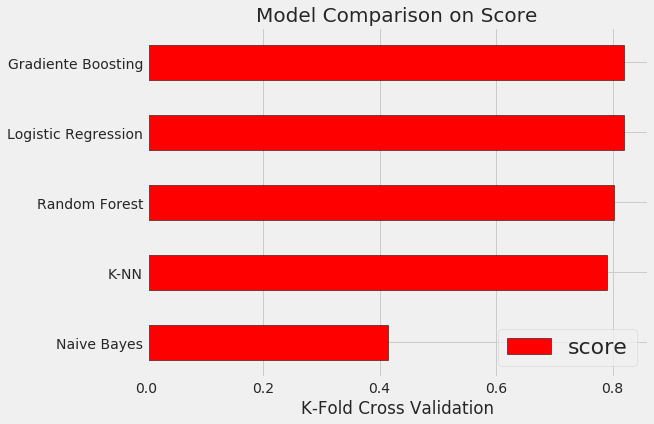

In [97]:
# Now, to better understand the results, I will show in a graph the model that has the better Cross Validation Score

plt.style.use('fivethirtyeight')
figsize=(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'K-NN',
                                           'Naive Bayes', 'Random Forest',
                                            'Gradiente Boosting'],
                                 'score': [logr_cross, knn_cross, naive_cross, 
                                         random_cross, gb_cross]})

# Horizontal bar chart of test mae
model_comparison.sort_values('score', ascending = True).plot(x = 'model', y = 'score', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('K-Fold Cross Validation'); plt.xticks(size = 14)
plt.title('Model Comparison on Score', size = 20);